In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [5]:
rf = LogisticRegression()
df.columns

Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15',
       'cat16', 'cat17', 'cat18', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4',
       'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'target'],
      dtype='object')

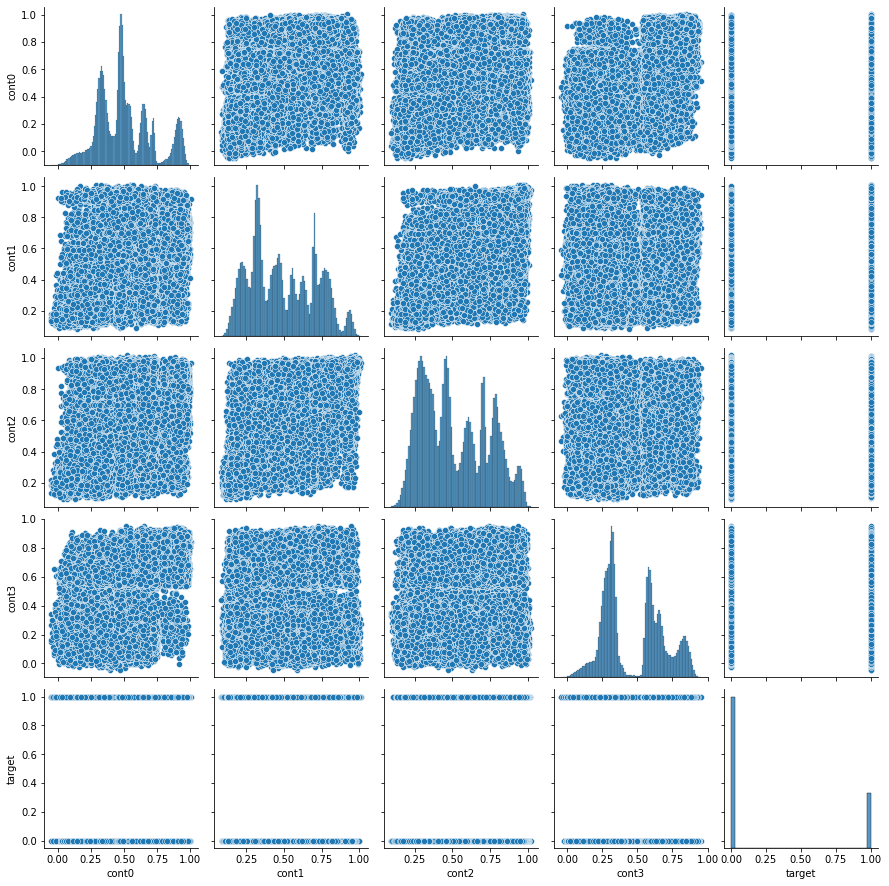

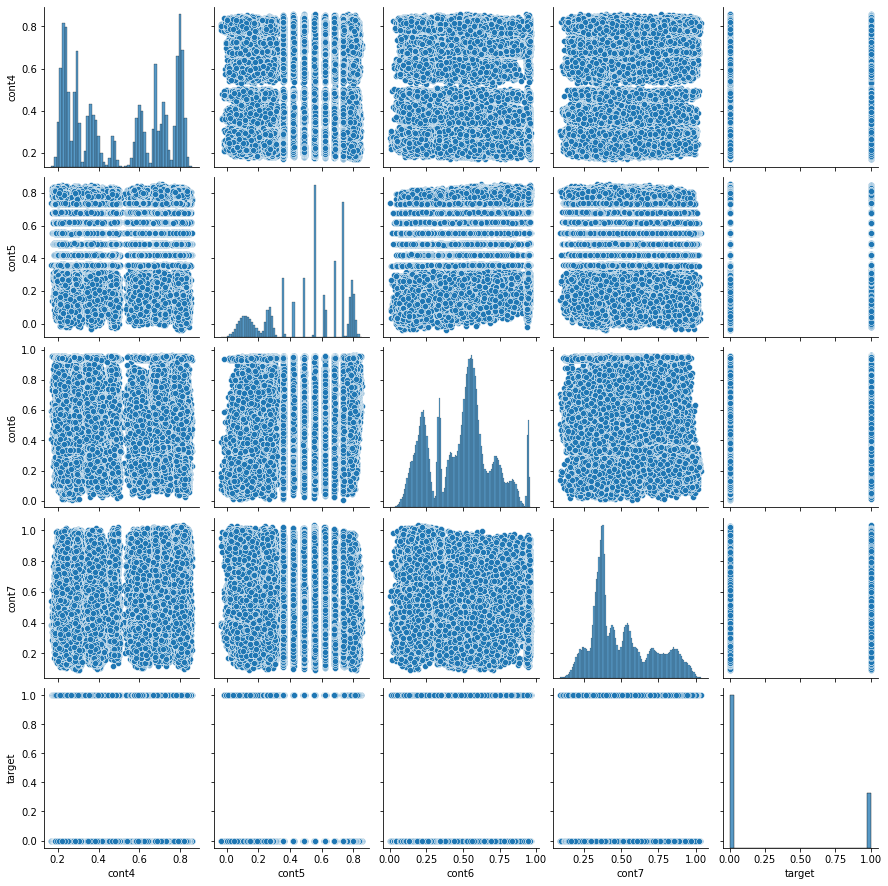

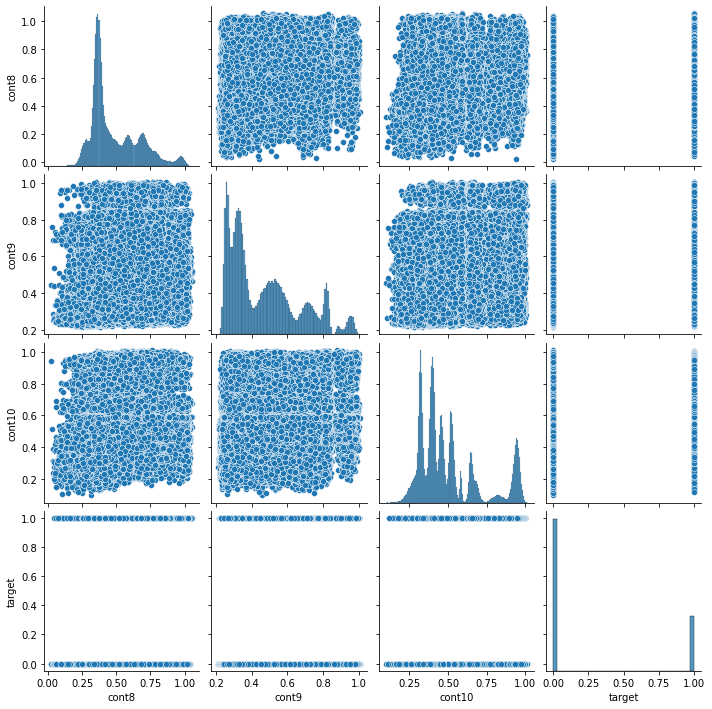

In [14]:
sns.pairplot(df[['cont0','cont1','cont2','cont3','target']])
sns.pairplot(df[['cont4','cont5','cont6','cont7','target']])
sns.pairplot(df[['cont8','cont9','cont10','target']])

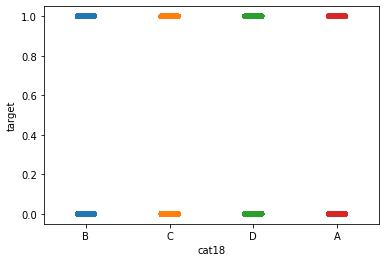

In [16]:
for i in range(19):
    t = 'cat'+str(i)
    sns.stripplot(x=df[t],y=df['target'],jitter=True)

In [5]:
df = pd.get_dummies(df)

In [6]:
df.to_csv("jhalak.csv",index=False)

In [24]:
X = df.drop(['target','cat10_AW',
 'cat10_BS',
 'cat10_CH',
 'cat10_CX',
 'cat10_FW',
 'cat10_GH',
 'cat10_IL',
 'cat10_JF',
 'cat10_LK',
 'cat10_MK',
 'cat10_MO',
 'cat10_MW'],axis=1)
y = df.target

In [25]:
train_X,test_X,train_y,test_y = train_test_split(X,y,random_state=2,test_size=0.3)

In [26]:
rf.fit(train_X,train_y)

RandomForestClassifier()

In [27]:
outcome = rf.predict(test_X)

In [28]:
from sklearn import metrics
score = metrics.f1_score(test_y, outcome)

In [29]:
score

0.6723449051367323

In [6]:
df1 = pd.read_csv('test.csv')

In [31]:
df1 = pd.get_dummies(df1)

In [41]:
df1 = df1.drop(['cat10_BU',
 'cat10_BW',
 'cat10_CA',
 'cat10_DG',
 'cat10_EJ',
 'cat10_JM',
 'cat10_KE',
 'cat10_KM'],axis=1)

In [48]:
df2 = rf.predict(df1)

In [49]:
df2 = 

0              5
1              6
2              8
3              9
4             11
           ...  
199995    499983
199996    499984
199997    499987
199998    499994
199999    499998
Name: id, Length: 200000, dtype: int64

In [53]:
with open("id.csv","w") as id:
    for i,j in zip(df1.id,df2):
        id.write((str(i)+","+str(j)+"\n"))

In [7]:
df1.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,5,A,F,A,A,F,BI,A,AH,AX,...,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,6,A,H,C,A,E,AB,I,F,N,...,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,8,A,N,C,A,F,AB,A,AH,BC,...,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,9,B,L,C,A,F,BI,A,E,AX,...,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,11,A,F,A,B,F,BI,A,AH,I,...,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781
